# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
                             import numpy as np
from numpy.random            import RandomState
from numpy                   import percentile
                             import pandas as pd
                             import seaborn as sns
                             import matplotlib.pyplot as plt
                             import scipy as st
from scipy.stats             import shapiro , normaltest
from sklearn.model_selection import train_test_split

from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor 
from sklearn.metrics         import mean_squared_error

from sklearn.experimental    import enable_iterative_imputer
from sklearn.impute          import IterativeImputer
#from sklearn.impute          import KNNImputer

In [1]:
# Загружаем данные в переменные
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")

NameError: name 'pd' is not defined

In [3]:
# Обучающая выборка
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
# Тестовая выборка
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
df_full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [9]:
# Проверим правильность расчета концентрации золота
C = df_train['final.output.concentrate_au']  # C — доля золота в концентрате после флотации/очистки;
F = df_train['rougher.input.feed_au']        # F — доля золота в сырье/концентрате до флотации/очистки;
T = df_train['final.output.tail_au']         # T — доля золота в отвальных хвостах после флотации/очистки.

# Расчет концентрации
Recovery = 100 * C * (F - T) / (F*(C - T))

# проверка расчета 
check = Recovery - df_train['final.output.recovery']

# средняя абсолютная ошибка
MAE = abs(check).sum() / len(check)
print('Средняя ошибка проверки recovery:', MAE)

Средняя ошибка проверки recovery: 8.863350445046566e-15


In [10]:
df_full[['rougher.output.tail_au' , 
        'primary_cleaner.output.tail_au',
        'secondary_cleaner.output.tail_au',
        'final.output.tail_au']].head(10)

,rougher.output.tail_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,final.output.tail_au
0,1.170244,2.106679,2.606185,2.143149
1,1.184827,2.353017,2.488248,2.224930
2,1.162562,2.416800,2.458187,2.257889
3,1.079755,2.262051,2.322062,2.146849
4,1.012642,2.277073,2.330448,2.055292
5,0.915835,2.114558,2.192127,1.918586
6,0.986248,2.223152,2.316720,2.058913
7,1.116110,2.112025,2.192197,2.143437
8,1.186780,2.243817,2.212084,2.209881
9,1.167140,2.025454,2.073737,2.209593


In [11]:
# Столбцы, не вошедшие в тестовую выборку
test_no_columns = set(df_train.columns) - set(df_test.columns)
test_no_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Проверка дубликатов

In [12]:
#### Проверка дубликатов в обучающей выборке
df_train.duplicated().sum() 

0

In [13]:
#### Проверка дубликатов в тестовой выборке
df_test.duplicated().sum() 

0

In [14]:
#### Проверка дубликатов в общей выборке
df_full.duplicated().sum() 

0

#### Заполнение пропусков


In [17]:
def imputer(data):
    date_series = pd.to_datetime(data['date'], format = "%Y-%m-%d %H:%M:%S") # преобразуем и записываем дату в другой сериес
    data = data.drop(['date'] , axis = 1)                    # Исключаем столбец с датой
    imp = IterativeImputer(max_iter=2 , random_state = 12)
    data_imputed = pd.DataFrame(data = imp.fit_transform(data) , columns = data.columns)
     # Объединяем столбец с датой и возвращаем заполненную таблицу 
    return pd.concat([date_series ,  data_imputed] , axis = 1)

In [18]:
# Заполняем пропуски во всех таблицах
df_train = imputer(df_train)
df_test = imputer(df_test)
df_full = imputer(df_full)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [19]:
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [20]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [21]:
df_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [22]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final.output.concentrate_ag                           22716 non-null float64
final.output.concentrate_pb                           22716 non-null float64
final.output.concentrate_sol                          22716 non-null float64
final.output.concentrate_au                           22716 non-null float64
final.output.recovery                                 22716 non-null float64
final.output.tail_ag                                  22716 non-null float64
final.output.tail_pb                                  22716 non-null float64
final.output.tail_sol                                 22716 non-null float64
final.output.tail_au                                  22716 non-null float64
primary_cleaner.input.sulfate                         22716 non-null float64
primary_cleaner.input.depressant     

---

### Вывод:
1. По результатам рассмотрения датафреймов можно отметить следующие особенности:
 - В данных есть есть большое количество пропусков. 
 - Столбец с датой имеет тип данных object. Все числовые значения вещественные.
 - В обучающей выборке всего 87 столбцов, в тестовой - 53. В тестовой выборке отсутствуют значения концентраций веществ на разных этапах очистки сырья.
 
2. Для проверки рассчитана эффективность обогащения. Значение средней абсолютной ошибки составило 8.9е-15, что говорит о правильно найденном значении восстановленного золота, т.к. ошибка очень мала.

3. Методом Iterativeimputer() библиотеки sklearn заполнены пропуски во всех датафреймах.

# 2. Анализ данных

### 2.1. Анализ концентрации металлов на различных этапах очистки


In [23]:
# Функция выделяет список столбцов по каждому металлу
def metal_division(data):
    # создаем списки столбцов с названием _ag , _pb , _au
    ag = [column for column in data.columns if '_ag' in column] 
    pb = [column for column in data.columns if '_pb' in column]
    au = [column for column in data.columns if '_au' in column]
    # возвращаем словарь списков
    return {'ag': ag , 'pb': pb , 'au': au}

In [24]:
# Функция строит графики распределения концентрации металла по процессам
def metall_hist(data , metall_name):
    plt.figure(figsize = (18,8))
    for a in data.columns:
        ax = sns.distplot(data[a])
    ax.set_title('Концентрация ({}) на разных этапах тех. процесса'.format(metall_name), fontsize = 20)
    ax.legend(data.columns , fontsize = 12)
    ax.set_xlabel('Concentrate of {} in processes'.format(metall_name),fontsize = 15)
    return plt.show()

#### Анализ  Ag

In [25]:
# записываем в датафрейм только столбцы для Ag
ag = df_full[metal_division(df_full)['ag']]

# выделяем столбцы концентраций на выходе из процесса
ag = ag[[  'final.output.concentrate_ag' , 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']]


In [26]:
ag.head()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,11.500771
1,6.029369,8.558743,11.615865
2,6.055926,8.603505,11.695753
3,6.047977,7.221879,11.915047
4,6.148599,9.089428,12.411054


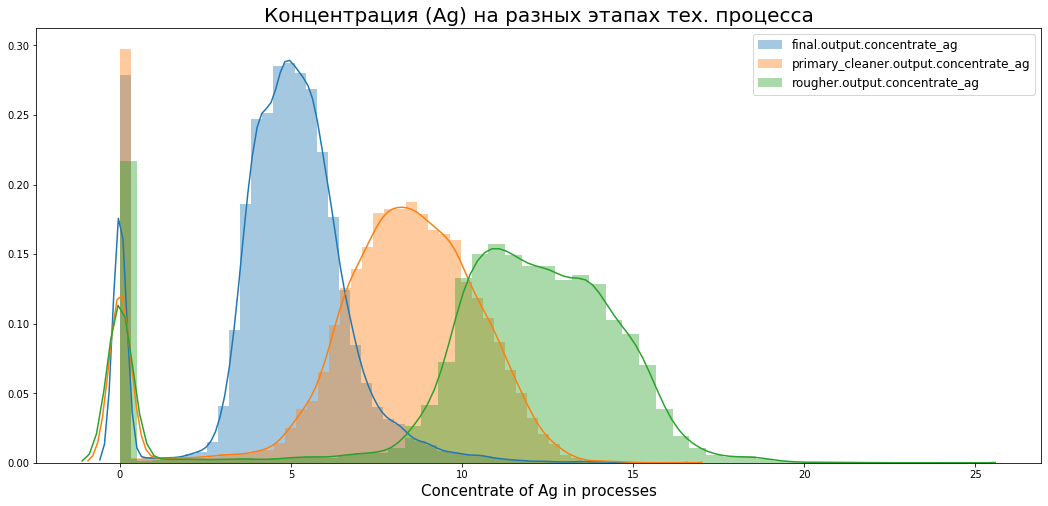

In [27]:
metall_hist(ag , "Ag")

#### Анализ  Pb

In [28]:
# записываем в датафрейм только столбцы для Pb
pb = df_full[metal_division(df_full)['pb']]

# выделяем столбцы концентраций на выходе из процесса
pb = pb[['final.output.concentrate_pb' , 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb']]


In [29]:
pb.head()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,7.101074
1,9.968944,10.497069,7.278807
2,10.213995,10.354494,7.216833
3,9.977019,8.496563,7.175616
4,10.142511,9.986786,7.240205


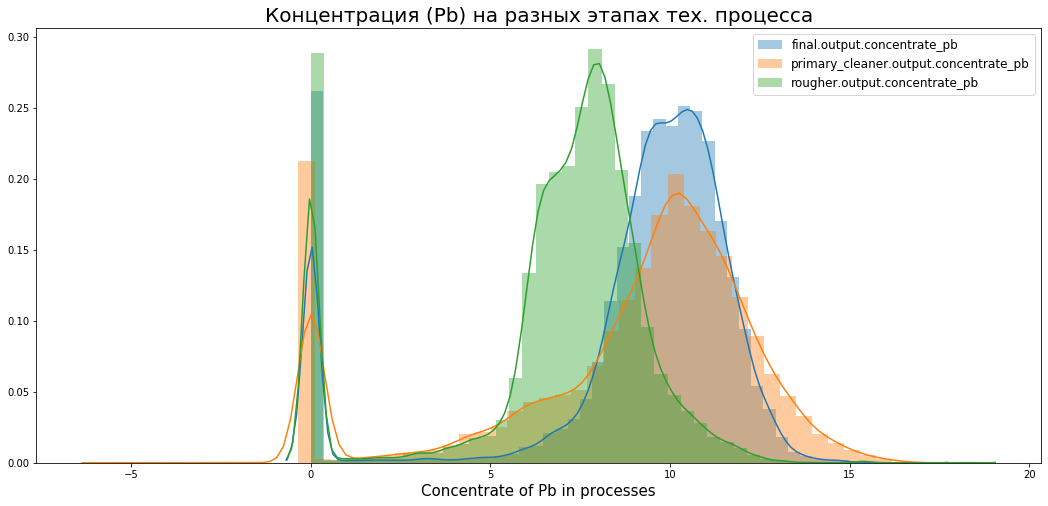

In [30]:
metall_hist(pb , "Pb")

#### Анализ  Au

In [31]:
# записываем в датафрейм только столбцы для Au
au = df_full[metal_division(df_full)['au']]

# выделяем столбцы концентраций на выходе из процесса
au = au[[  'final.output.concentrate_au' , 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au']]

In [32]:
au.head()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
0,42.192020,34.174427,19.793808
1,42.701629,34.118526,20.050975
2,42.657501,33.969464,19.737170
3,42.689819,28.260743,19.320810
4,42.774141,33.044932,19.216101


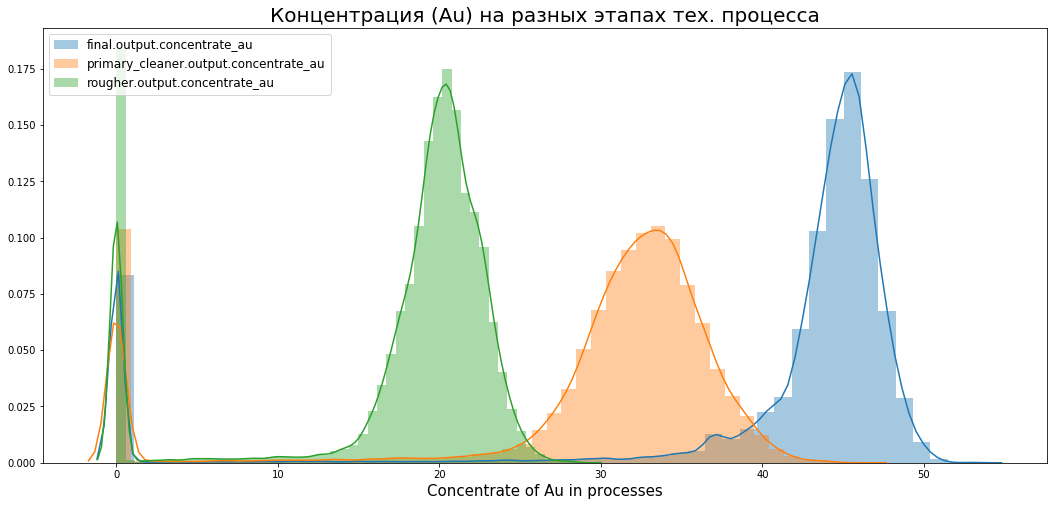

In [33]:
metall_hist(au , "Au")

### Выводы:
Методом библиотеки seaborn  построены распределения концентрации металлов в исходном сырье, первой степени очистки и финально
Можно отметить следующие особенности:
- в значениях концентрации отмечаются выбросы , большое количество нулевых значений.
- при большей степени очистки концентрация Ag уменьшается.
- концентрация Pb на финальном этапе очистки незначительно увеличивается относительно исходного сырья. Можно предположить, что это вызвано уменьшением концентрации серебра Ag.
- концентрация золота на финальном этапе очистки увеличивается более чем в 2 раза относительно исходного сырья. 


---

### 2.2. Сравнение гранул сырья на обучающей и тестовой выборках

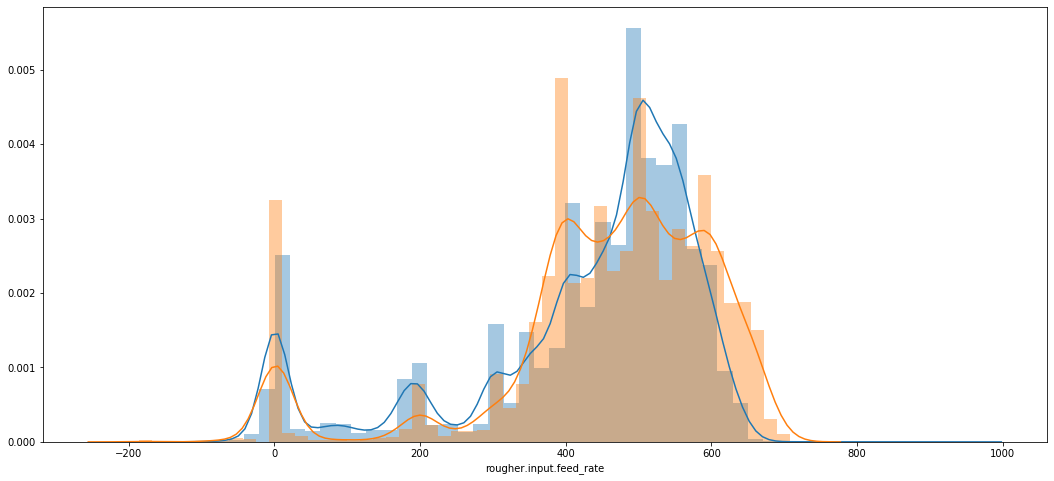

In [34]:
plt.figure(figsize = (18,8))
sns.distplot(df_train['rougher.input.feed_rate'] , bins=50)
sns.distplot(df_test['rougher.input.feed_rate'],  bins=50)
plt.show()

### Вывод:
При сравнении распределений на тестовой и обучающей выборках видно, что распределения схожи и на работу модели незначительные различия не повлияют.

---

### 2.3. Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [35]:
# Разделяем датафреймы на процессы
def process_division(data):
    # выделяем процессы
    rougher =           [column for column in data.columns if 'rougher' in column and 'concentrate_' in column]
    primary_cleaner =   [column for column in data.columns if 'primary_cleaner' in column and 'concentrate_' in column]
    final =             [column for column in data.columns if 'final' in column and 'concentrate' in column]
    
    # возвращаем словарь со списками
    return {'rougher': rougher,            
            'primary_cleaner': primary_cleaner ,       
            'final': final ,          
           }

In [36]:
# проверим работу функции
process_division(df_full)['rougher']

['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [37]:
# проверим работу функции
process_division(df_full)['primary_cleaner']

['primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au']

In [38]:
# проверим работу функции
process_division(df_full)['final']

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au']

In [39]:
# выделяем датафреймы по процессам из общего датафрейма
rougher_df            = df_full[process_division(df_full)['rougher']]
primary_cleaner_df    = df_full[process_division(df_full)['primary_cleaner']]
final_df              = df_full[process_division(df_full)['final']]

In [40]:
# Суммируем значения концентраций веществ и выделяем в series
rougher_df_sum         = rougher_df.sum(axis=1)
primary_cleaner_df_sum = primary_cleaner_df.sum(axis=1)
final_df_sum           = final_df.sum(axis=1)
# объединяем все series
sum_concentrate = pd.concat([rougher_df_sum , primary_cleaner_df_sum , final_df_sum] , axis=1)
# меняем названия столбцов
sum_concentrate.columns = ['rougher_df_sum' , 'primary_cleaner_df_sum' , 'final_df_sum']

In [41]:
sum_concentrate.head(10)


,rougher_df_sum,primary_cleaner_df_sum,final_df_sum
0,66.424950,72.640924,63.644396
1,67.012710,72.543485,63.957723
2,66.103793,72.095042,64.311180
3,65.752751,59.957723,63.573449
4,65.908382,71.321010,64.004667
5,64.955919,70.607932,63.646320
6,65.372419,71.165854,63.156407
7,65.180132,71.533310,62.908843
8,65.625127,72.072013,64.185763
9,65.408849,71.887397,64.185200


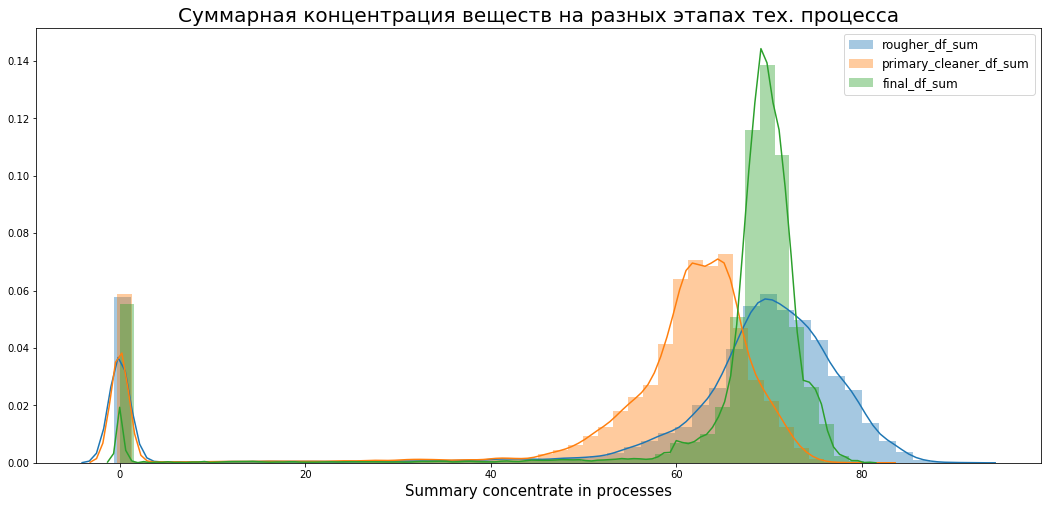

In [42]:
# строим графики распределения концентрации металла по процессам
plt.figure(figsize = (18,8))
for a in sum_concentrate.columns:
    ax = sns.distplot(sum_concentrate[a])
ax.set_title('Суммарная концентрация веществ на разных этапах тех. процесса', fontsize = 20)
ax.legend(sum_concentrate.columns , fontsize = 12)
ax.set_xlabel('Summary concentrate in processes',fontsize = 15)
plt.show()

### Выводы:
Методом библиотеки seaborn построены распределения суммарных концентраций веществ для разных этапов очистки сырья.
Отмечены следующие особенности:
- в выборке есть большая доля выбросов, которые влияют на распределение.
- распределение концентраций веществ в исходном сырье и после грубой очистки близко к стандартному нормальному распределению.
- распределение концентраций веществ в финальном сырье имеет меньшую дисперсию, и соответственно меньший разброс значений. Чем Уже распределение концентраций после финальной очистки тем лучше работает производство, и выпускает более качественное сырье. 

- т.к. столбцы с концентрациями отсутствуют в тестовой выборке и в обучающей соответственно их не должно быть, то удалять их нет необходимости.

### Удаляем выбросы из выборок

In [92]:
# Функция определяет выбросы и выводит обработанную таблицу
def outliers_remove(data):
    # создаем общий список с концентрациями
    concentrate_list = [column for column in data.columns if 'concentrate_' in column]
    Q1 = data[concentrate_list].quantile(0.25)     # 25% квантиль
    Q3 = data[concentrate_list].quantile(0.75)     # 75% квантиль
    lower = (Q1 - 1.5 * IQR)                       # нижняя граница выбросов
    upper = (Q3 + 1.5 * IQR)                       # верхняя граница выбросов
    # датафрейм с отсеченным выбросами в концентрациях, удаленными пропусками
    data = (data.iloc[data[concentrate_list][(data[concentrate_list] > lower) 
                                            & (data[concentrate_list] < upper)].dropna(axis=0).index]
           )
    return data 

In [94]:
df_train_clean = outliers_remove(df_train)
df_test_clean = outliers_remove(df_test)
df_full_clean = outliers_remove(df_full)

ValueError: need at least one array to concatenate

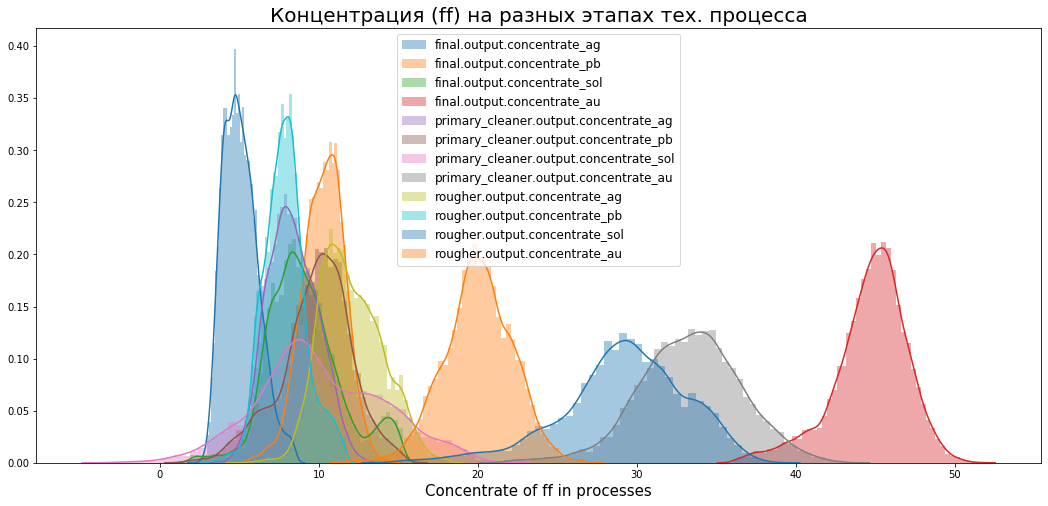

In [91]:
metall_hist(outliers_remove(df_train[concentrate_list]), 'ff')

In [98]:
concentrate_list = [column for column in df_test.columns if 'concentrate_' in column]
df_test.column

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [47]:
Q1 = df_train[concentrate_list].quantile(0.25)
Q3 = df_train[concentrate_list].quantile(0.75)
IQR = Q3-Q1
IQR


final.output.concentrate_ag               1.842061
final.output.concentrate_pb               2.243028
final.output.concentrate_sol              3.352184
final.output.concentrate_au               3.981222
primary_cleaner.output.concentrate_ag     2.795388
primary_cleaner.output.concentrate_pb     4.005636
primary_cleaner.output.concentrate_sol    6.356999
primary_cleaner.output.concentrate_au     5.396641
rougher.output.concentrate_ag             3.291073
rougher.output.concentrate_pb             2.143060
rougher.output.concentrate_sol            6.845392
rougher.output.concentrate_au             3.811024
dtype: float64

In [83]:
b = df_train[concentrate_list][(df_train[concentrate_list] > (Q1 - 1.5 * IQR)) & (df_train[concentrate_list] < (Q3 + 1.5 * IQR))].dropna(axis=0).index

In [87]:
df_train.iloc[b]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [84]:
len(b)

12349

In [ ]:
b=b.dropna(axis=0)
b.shape

In [ ]:
outliers_clear(sum_concentrate ,'rougher_df_sum' )

In [ ]:
sum_concentrate

### Вывод: 
Из таблиц удаляем строки с выбросами в столбцах с концентрациями 

# 3. Модель

In [101]:
x_train = df_train.drop(['date' , 'final.output.recovery' ], axis =1)
x_test = df_test.drop(['date' ], axis =1)

y = df_train['final.output.recovery' ]
model = LinearRegression()
model.fit(x , y)
y_pred = model.predict(x_test)

ValueError: shapes (5856,52) and (85,) not aligned: 52 (dim 1) != 85 (dim 0)

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке